In [1]:
from IPython.core.interactiveshell import import_item
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

base = '/content/COVID-19_Radiography_Dataset/'

In [2]:
folders = os.listdir(base)
print(folders)

['Normal', 'Lung_Opacity', 'COVID', 'Viral Pneumonia']


In [3]:
%%time

Data, Lables = [], []

for item in folders:
    new_path = os.path.join(base, item)
    new_path += '/images'
    for img in os.listdir(new_path):
        img_path = os.path.join(new_path, img)
        Data.append(np.array(cv2.resize(cv2.imread(img_path).astype('float32') / 255.0, (200,200))))
        Lables.append(folders.index(item))

CPU times: user 2min 1s, sys: 41.9 s, total: 2min 43s
Wall time: 1min 20s


In [4]:
x_train, x_test, y_train, y_test = train_test_split(Data, Lables, test_size = .2, random_state = 1)

In [5]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [26]:
restnet = keras.applications.resnet.ResNet50(input_shape = x_train[0].shape, weights = 'imagenet', include_top = False)

94781440/94765736 [==============================] - 1s 0us/step


In [27]:
for layer in restnet.layers:
  layer.trainable = False

In [28]:
x = keras.layers.Flatten()(restnet.output)

In [29]:
prediction = keras.layers.Dense(len(folders), activation = 'softmax')(x)

In [30]:
model = keras.models.Model(restnet.input, prediction)

In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [32]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [33]:
%%time
history = model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
530/530 [==============================] - 1576s 3s/step - loss: 1.4274 - accuracy: 0.5560 - val_loss: 0.7204 - val_accuracy: 0.7007
Epoch 2/5
530/530 [==============================] - 1560s 3s/step - loss: 0.9973 - accuracy: 0.6438 - val_loss: 0.7189 - val_accuracy: 0.7092
Epoch 3/5
530/530 [==============================] - 1571s 3s/step - loss: 0.9769 - accuracy: 0.6574 - val_loss: 1.1467 - val_accuracy: 0.6497
Epoch 4/5
530/530 [==============================] - 1541s 3s/step - loss: 0.9284 - accuracy: 0.6908 - val_loss: 0.7596 - val_accuracy: 0.7075
Epoch 5/5
530/530 [==============================] - 1562s 3s/step - loss: 0.9413 - accuracy: 0.6912 - val_loss: 0.9123 - val_accuracy: 0.6709
CPU times: user 7h 25min 36s, sys: 16min 33s, total: 7h 42min 9s
Wall time: 2h 10min 26s


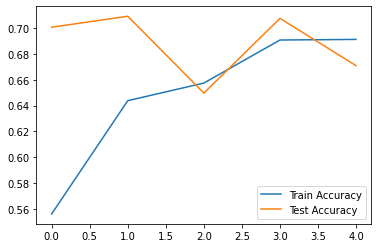

In [34]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.legend()
plt.show()

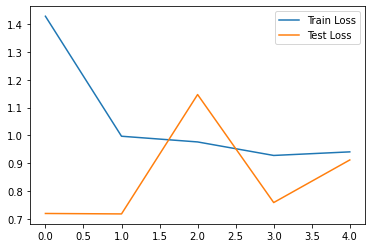

In [35]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()
plt.show()

In [36]:
model.evaluate(x_test, y_test)

133/133 [==============================] - 315s 2s/step - loss: 0.9123 - accuracy: 0.6709


[0.9122715592384338, 0.6709189414978027]